In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)


c:\Users\karti\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
].copy()
df_DA_US=df_DA_US.dropna(subset='salary_year_avg')

<Axes: >

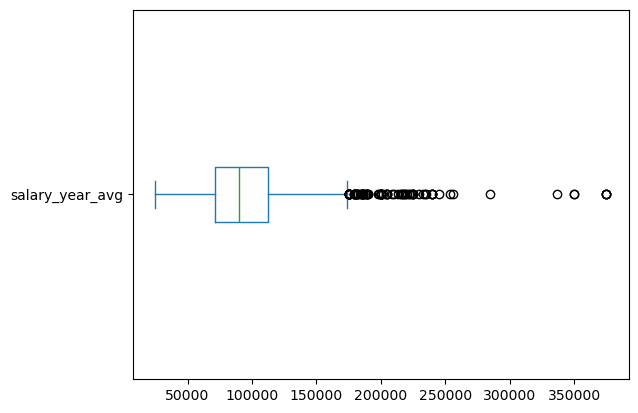

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

C:\Users\karti\AppData\Local\Temp\ipykernel_12424\912313917.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


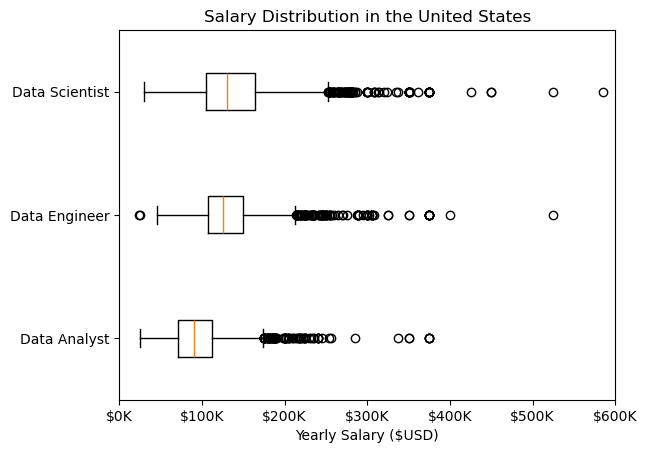

In [5]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data
df_US = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'United States')
].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

# Create salary lists
job_list = [
    df_US[df_US['job_title_short'] == job_title]['salary_year_avg']
    for job_title in job_titles
]

# Plot
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

# Format x-axis to show K
ax = plt.gca()
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
)
plt.xlim(0,600000)
plt.show()


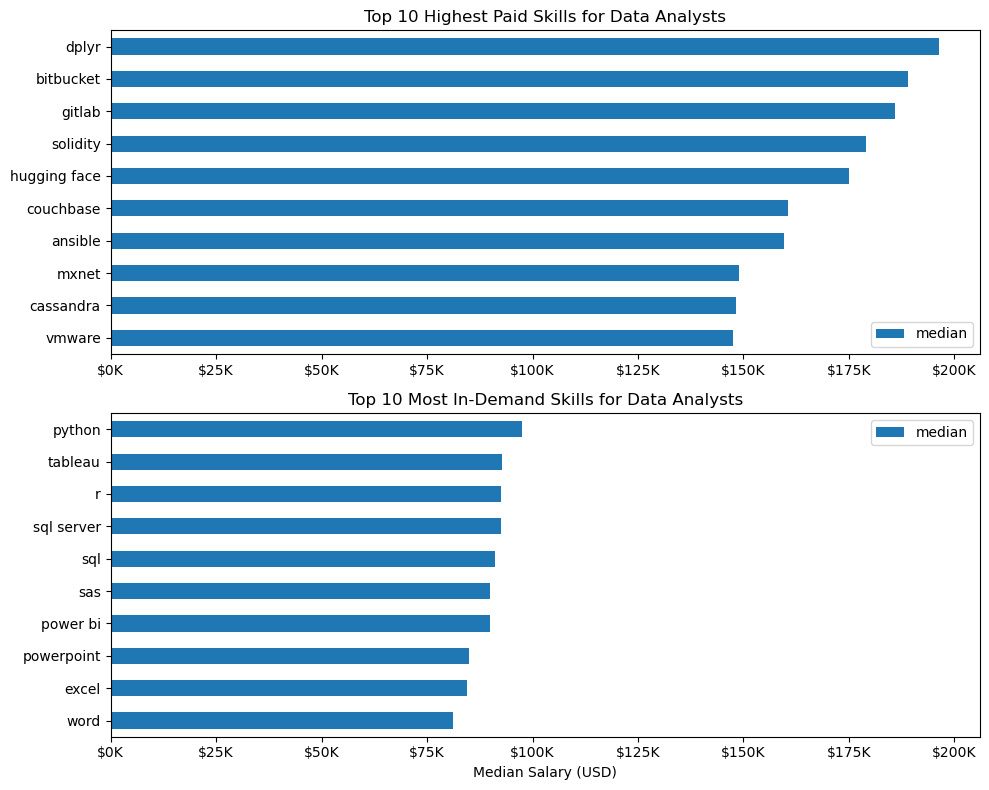

In [8]:
# Fix the unhashable list issue
df_DA_US = df_DA_US.explode('job_skills')

# Group by skills
df_DA_US_group = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
)

# Top 10 highest paid skills
df_DA_top_pay = (
    df_DA_US_group
    .sort_values(by='median', ascending=False)
    .head(10)
)

# Top 10 most in-demand skills
df_DA_skills = (
    df_DA_US_group
    .sort_values(by='count', ascending=False)
    .head(10)
    .sort_values(by='median', ascending=False)
)

# Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(ax[0].get_xlim())

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

ax[1].set_xlim(ax[0].get_xlim())

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
ax[0].xaxis.set_major_formatter(formatter)
ax[1].xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()
